In [337]:
import pandas as pd
import numpy as np
import seaborn as sns
from numpy import percentile
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

# 1. Read the column description and ensure you understand each attribute well

In [338]:
bank_data = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [339]:
bank_data.shape

(5000, 14)

The dataset has 14 cloumns and 5000 rows

In [340]:
bank_data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

All the attributes are of integer type except CCAvg, even the categorical variables like Personal Loan,Securities Account, CD Account, Online and CreditCard are already LabelEncoded as 1 or 0

In [341]:
df.isna().apply(pd.value_counts)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
False,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000


None of the rows contain null values

In [342]:
file_nullcols = df.isnull().sum()
file_nullcols

Age                  0
Experience           0
Income               0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

Zero count of nulls for each attribute

# 2. Study the data distribution in each attribute, share your findings

In [343]:
df = pd.DataFrame(bank_data)
df.rename(columns={"Personal Loan": "PersonalLoan", "Securities Account": "SecuritiesAccount","CD Account" : "CDAccount"},inplace = True)
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


1) The mininum age in the distribution is 23 and it gradually increases and maximum age stands at 67.

2) Minimum Experience is -3 which infers that the person still needs 3 years to start working. And then the graph gradually increases with 25% of the population having experience within 10 years, 50% within 20 years, 75% within 30 years with maximum experience as 43 years.

3) Income seems to be skewed towards the right with minimum as low as 8, and first 75% within the range of 98 and suddenly as high as 224. This results to comparitively high standard deviation.

4) Family seems to be equally distributed. First 25% having 1 member, next 25% with 2 members, next 25% having 3 and finally the last 25% with 4 members in their family.

5) CCAvg is also highly skewed to the right.Very few people have an average more than 2.5. 75% of the people have 2.5 or less CCAvg and the final 25% of the person have CCAvg more than 2.5 and 10.

6) Most of the people i.e. - almost 50% of the population are Undergrad rest of them are divided into Advanced/Professional and  Graduate;

7) Mortgage is highly skewed with standard deviation of 101.71. 50% of the population have the value as 0 and then there is sudden hike in Mortgage and next 25% have value as 101 and then for the next 25% the value increases as high as 635.

8) Most of the people have not opted for PersonalLoan, SecuritiesAccount, CDAccount. Only 25% of them having opted for PersonalLoan. And the same for SecuritiesAccount and CDAccount.

9) Only 25% of thr population have not opted for Online banking. Rest 75% have opted for online option.

10) CreditCard option is equally distributed as 50% of the population have opted and rest of the 50% have not opted for this option.


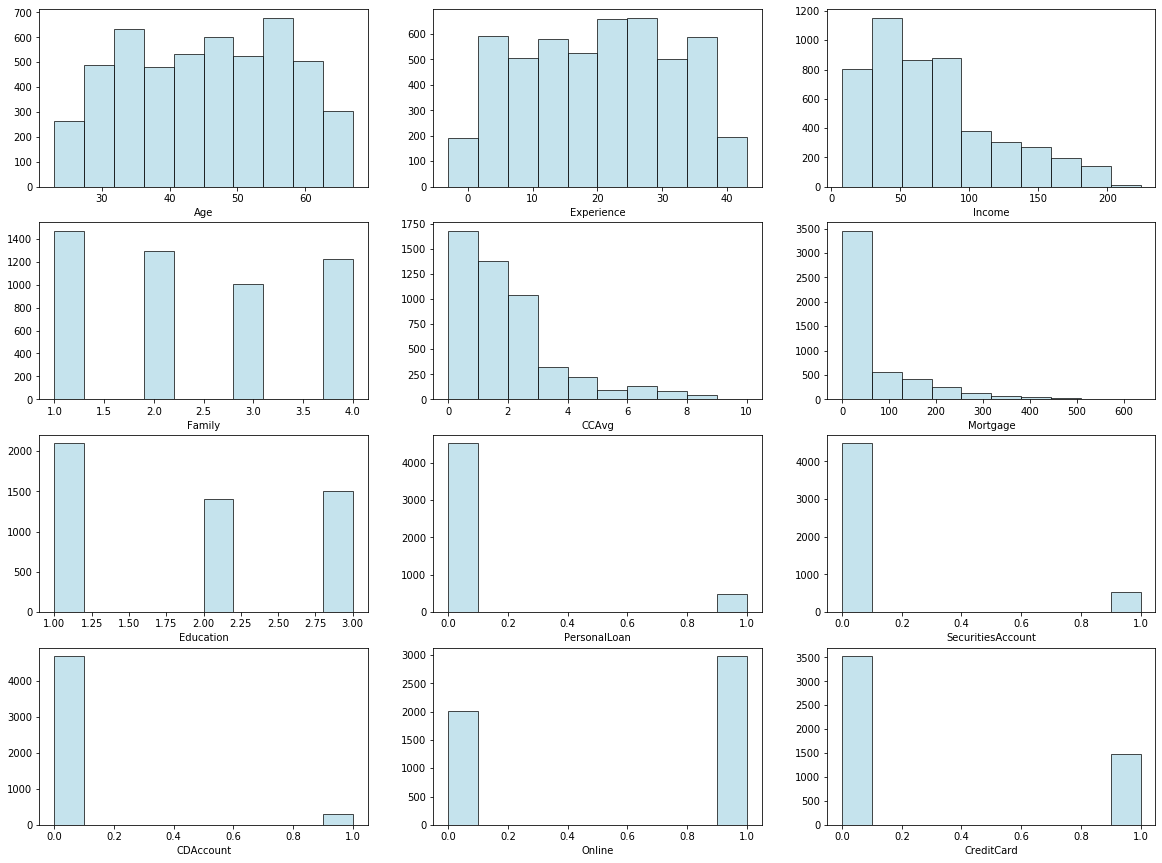

In [344]:
#Plots to see the distribution of the continuous features individually

plt.figure(figsize= (20,15))
plt.subplot(4,3,1)
plt.hist(df.Age, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Age')

plt.subplot(4,3,2)
plt.hist(df.Experience, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Experience')

plt.subplot(4,3,3)
plt.hist(df.Income, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Income')

plt.subplot(4,3,4)
plt.hist(df.Family, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Family')

plt.subplot(4,3,5)
plt.hist(df.CCAvg, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('CCAvg')

plt.subplot(4,3,6)
plt.hist(df.Mortgage, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Mortgage')

plt.subplot(4,3,7)
plt.hist(df.Education, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Education') 

plt.subplot(4,3,8)
plt.hist(df.PersonalLoan, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('PersonalLoan') 

plt.subplot(4,3,9)
plt.hist(df.SecuritiesAccount, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('SecuritiesAccount') 

plt.subplot(4,3,10)
plt.hist(df.CDAccount, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('CDAccount') 

plt.subplot(4,3,11)
plt.hist(df.Online, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Online') 

plt.subplot(4,3,12)
plt.hist(df.CreditCard, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('CreditCard') 

plt.show()

Below are findings from the histogram plotted above:

1) Age and Experience are almost normally distributed.

2) Income and CCAvg is skewed towards the right, not evenly distributed.

3) Mortgage is very highly skewed towards the right.

4) Highest number of the people are 1 member family, the next are 2 members of family. Following that is 4 member family and finally lowest of them have 3 member family.

5) Most of the people are Undergrad;then Advanced/Professional and min count is for Graduate;

6) Most of them have not opted for PersonalLoan, SecuritiesAccount, CDAccount, CreditCard

7) Comparatively more number of the people have opted for Internet/Online banking

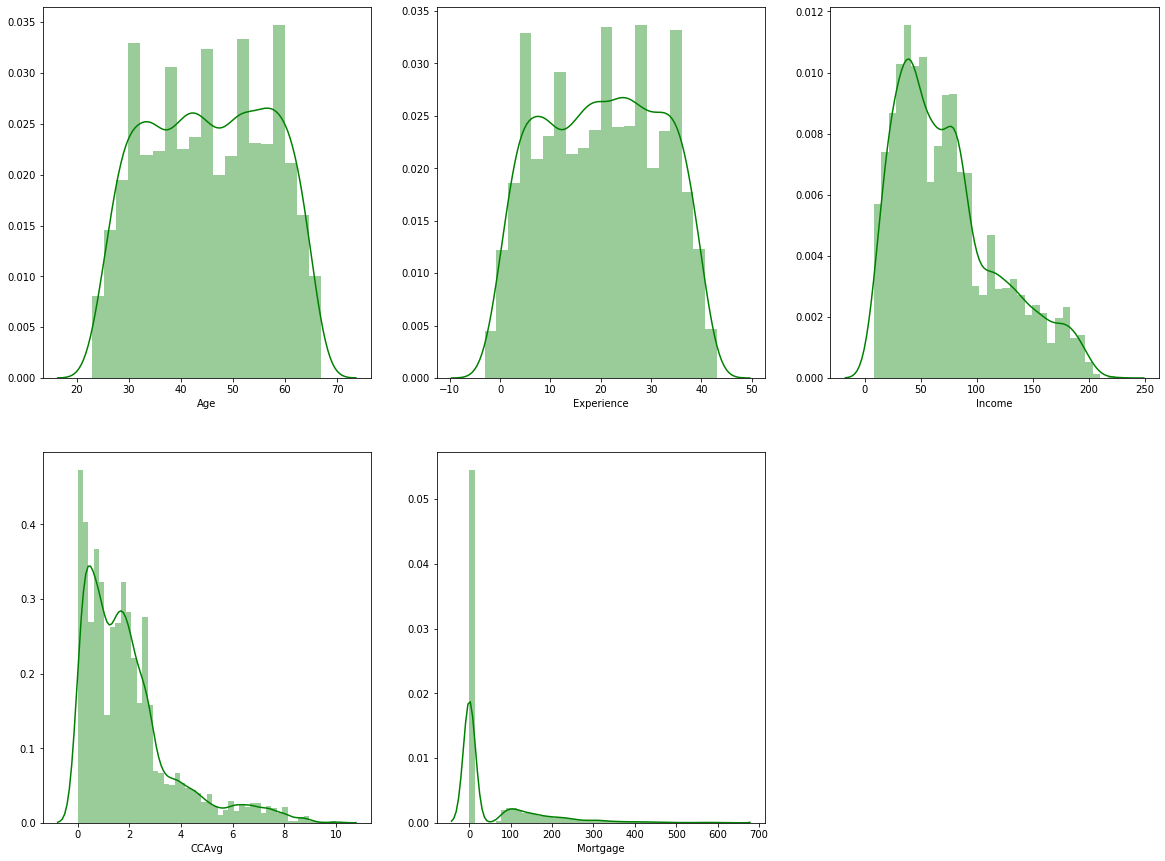

In [345]:
plt.figure(figsize= (20,15))
plt.subplot(2,3,1)
sns.distplot(df.Age,color='green')

plt.subplot(2,3,2)
sns.distplot(df.Experience,color='green')

plt.subplot(2,3,3)
sns.distplot(df.Income, color='green')

plt.subplot(2,3,4)
sns.distplot(df.CCAvg, color='green')

plt.subplot(2,3,5)
sns.distplot(df.Mortgage, color='green')


In [346]:
import statsmodels.api as sm
import scipy.stats as stats
Skewness = pd.DataFrame({'Skewness' : [stats.skew(df.Age),stats.skew(df.Experience),stats.skew(df.Income),stats.skew(df.CCAvg),stats.skew(df.Mortgage)]},
                        index=['Age','Experience','Income','CCAvg','Mortgage'])  # Measure the skeweness of the required columns
Skewness

,Skewness
Age,-0.029332
Experience,-0.026317
Income,0.841086
CCAvg,1.597964
Mortgage,2.103371


1) Age and Experience are very slightly skewed towards the left as the value is very close to zero. Thus they are evenly distributed.

2) Mortgage is very highly skewed towards right with skew value of 2.10, followed by CCAvg with skew value of 1.59 and then Income with skew value of 0.84. All these values are quite far from zero and thus are not normally distibuted.

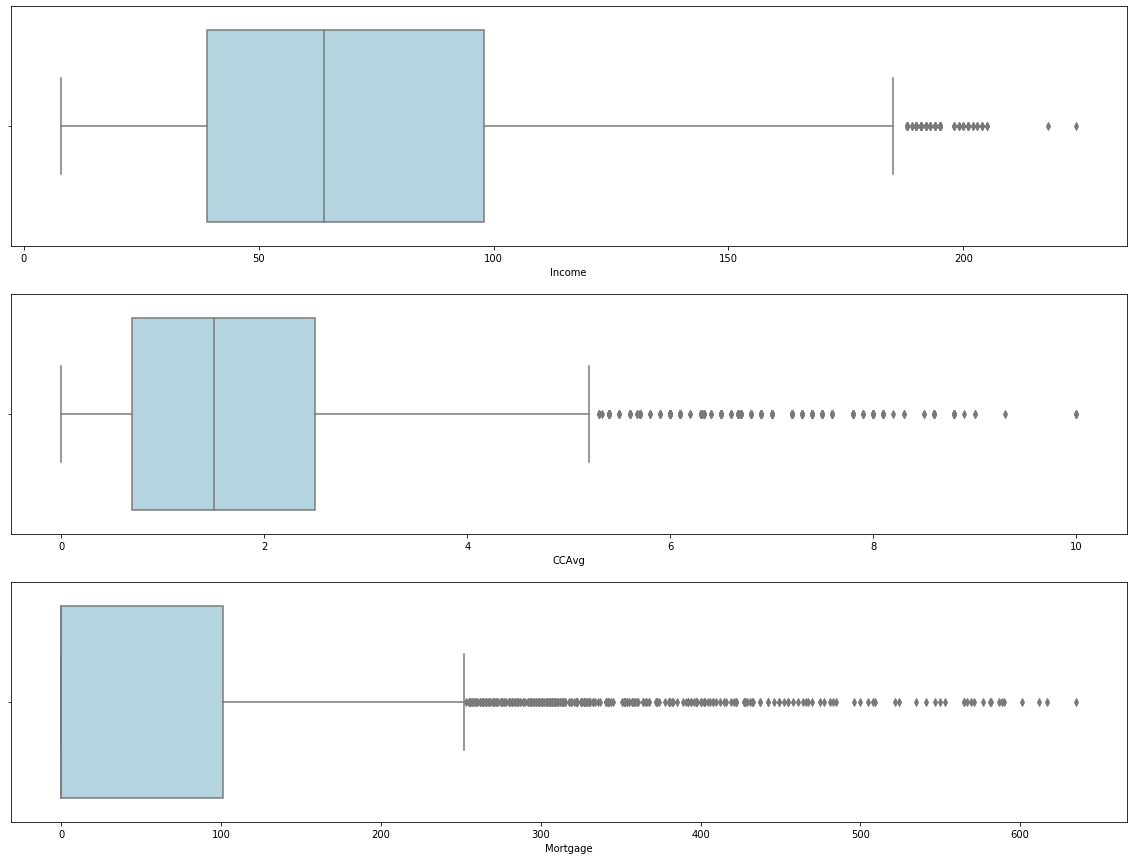

In [347]:
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x= df.Income, color='lightblue')

plt.subplot(3,1,2)
sns.boxplot(x= df.CCAvg, color='lightblue')

plt.subplot(3,1,3)
sns.boxplot(x= df.Mortgage, color='lightblue')

plt.show()

The excessive number of outliers for Mortgage depicts the level of skewness.

In [348]:
df.drop(['ID',"ZIP Code"],axis=1,inplace=True)

'ID' and "ZIP Code" are not needed thus dropping from the dataframe

In [349]:
df.corr() # It will show correlation matrix 

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.052563,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
PersonalLoan,-0.007726,-0.007413,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
SecuritiesAccount,-0.000436,-0.001232,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CDAccount,0.008043,0.010353,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


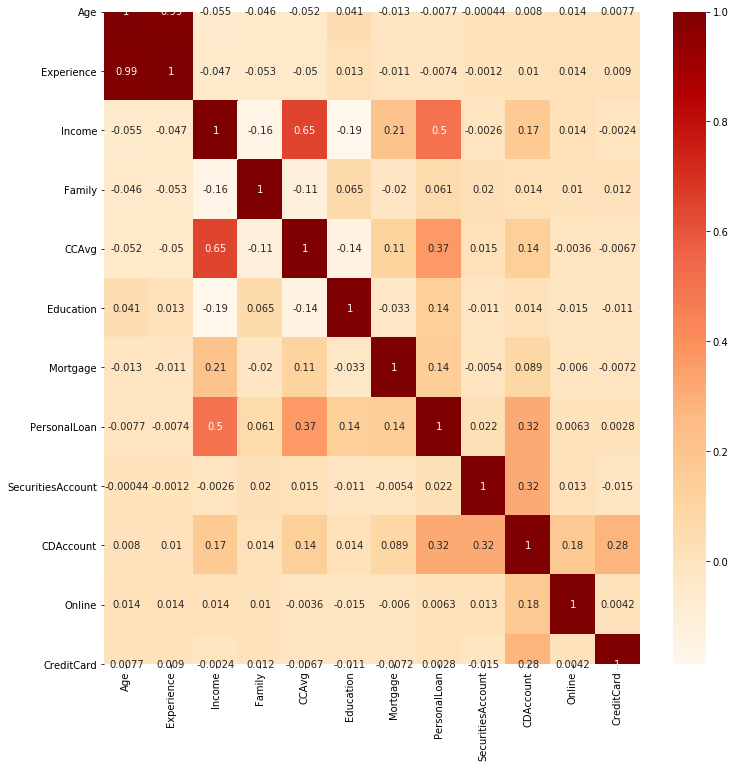

In [350]:
corr1 = df.corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr1, annot=True,cmap = "OrRd")

# 3. Get the target column distribution. Your comments

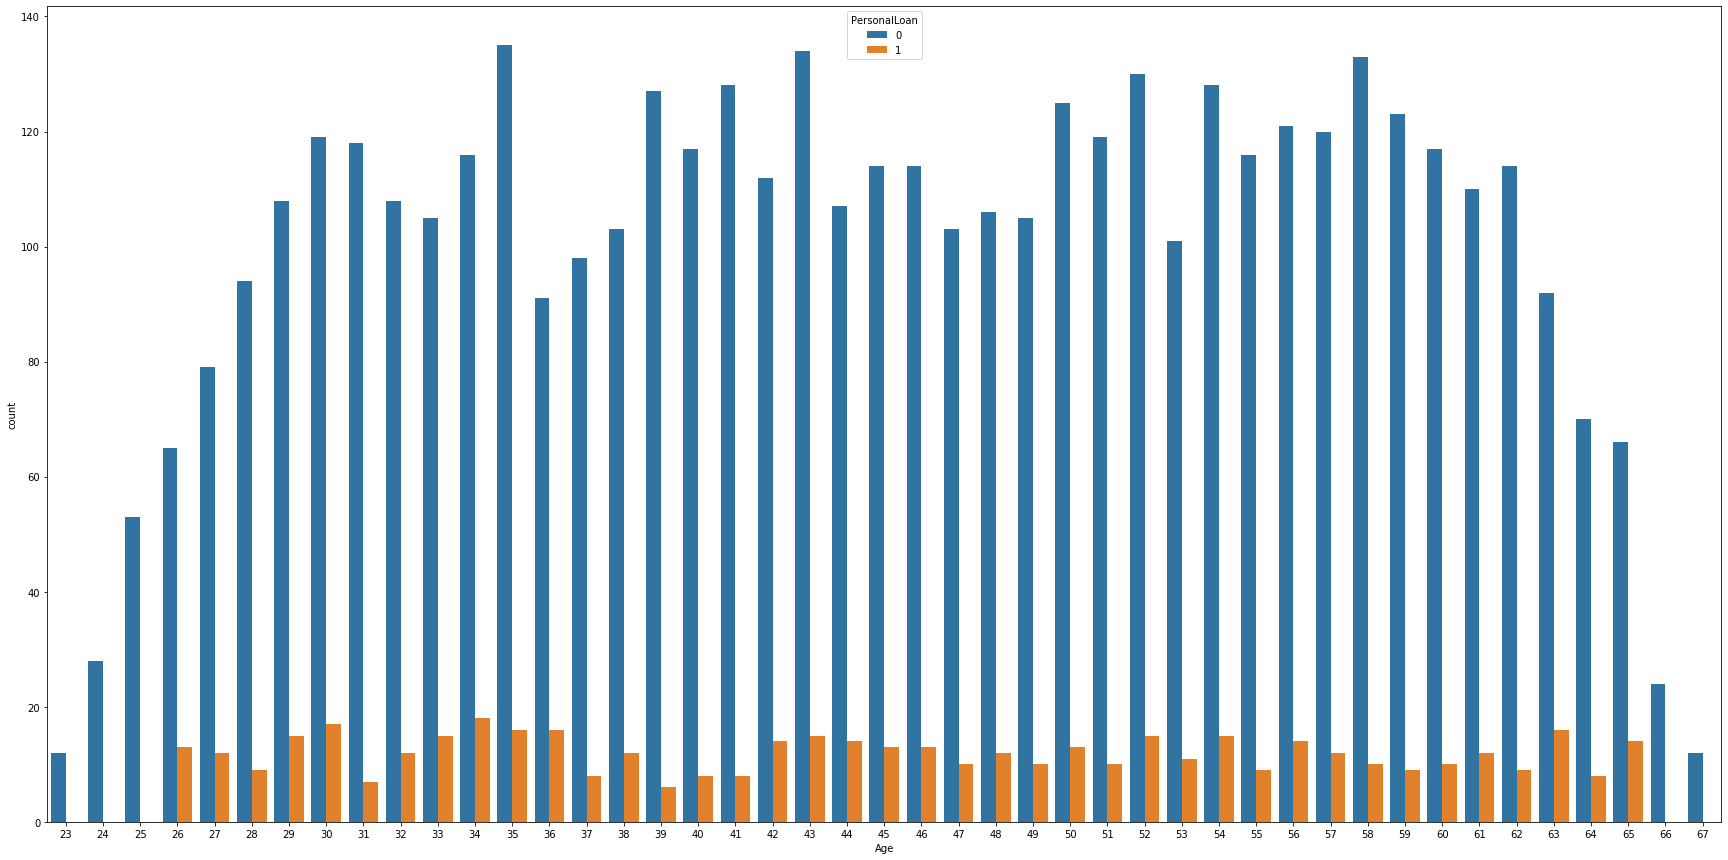

In [351]:
plt.figure(figsize= (30,15))
plt.subplot(1,1,1)
sns.countplot(x = 'Age',hue="PersonalLoan", data = df)

People with the age range between 26 to 65 opt for personal loan

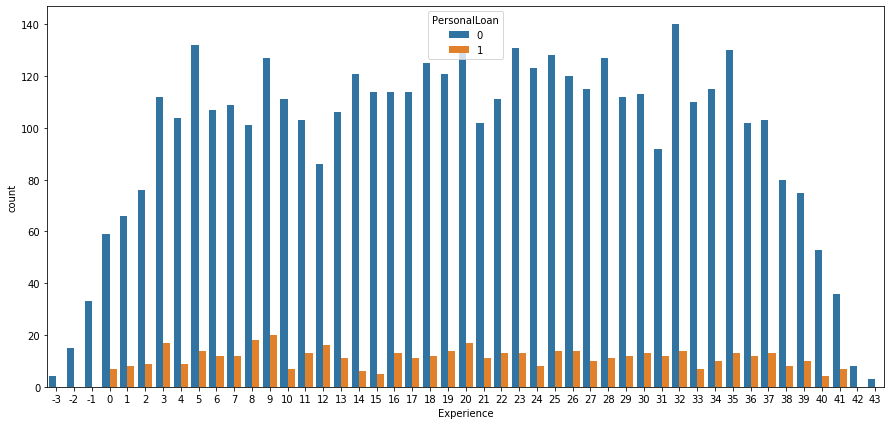

In [352]:
plt.figure(figsize= (15,7))
plt.subplot(1,1,1)
sns.countplot(x = 'Experience',hue="PersonalLoan", data = df)

People who have no experience do not opt for Personal Loan at all

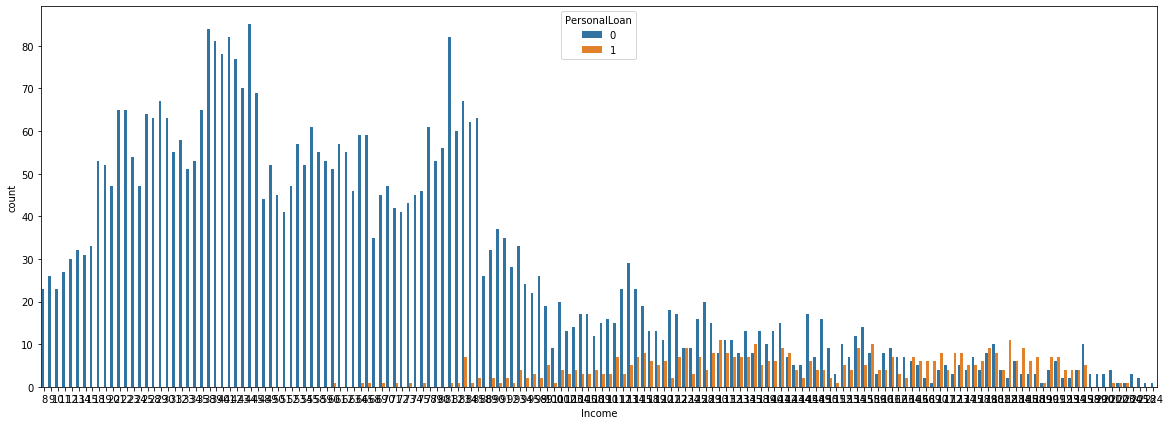

In [353]:
plt.figure(figsize= (20,7))
plt.subplot(1,1,1)
sns.countplot(x = 'Income',hue="PersonalLoan", data = df)

People earning more tend to opt for personal loan more often

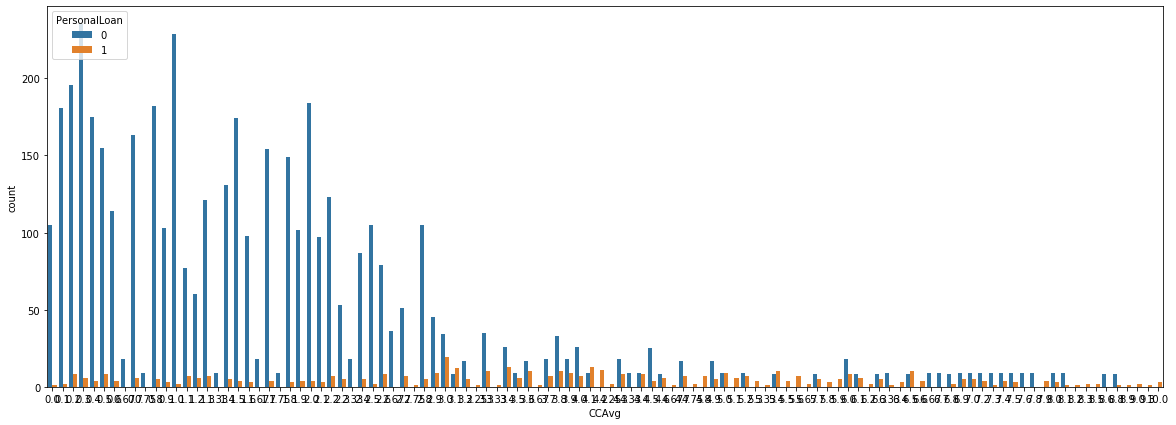

In [354]:
plt.figure(figsize= (20,7))
plt.subplot(1,1,1)
sns.countplot(x = 'CCAvg',hue="PersonalLoan", data = df)

Personal Loan is almost evenly opted by customers with all range of CCAvg

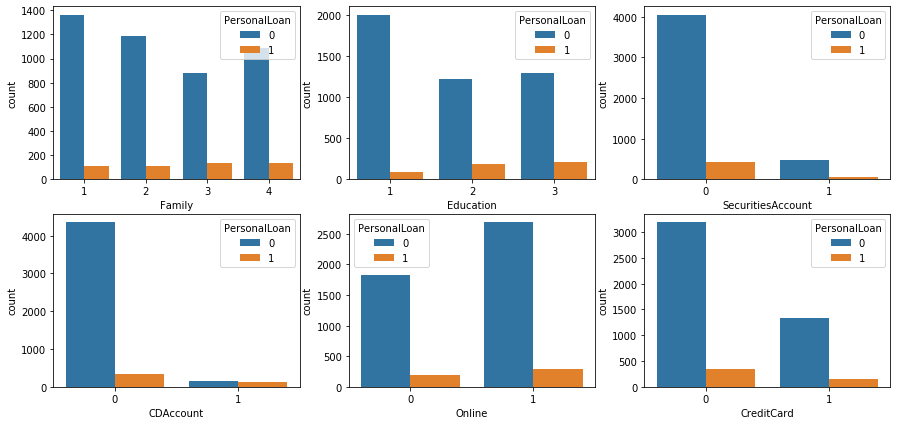

In [355]:
plt.figure(figsize= (15,7))
plt.subplot(2,3,1)
sns.countplot(x = 'Family',hue="PersonalLoan", data = df)

plt.subplot(2,3,2)
sns.countplot(x = 'Education',hue="PersonalLoan", data = df)

plt.subplot(2,3,3)
sns.countplot(x = 'SecuritiesAccount',hue="PersonalLoan", data = df)

plt.subplot(2,3,4)
sns.countplot(x = 'CDAccount',hue="PersonalLoan", data = df)

plt.subplot(2,3,5)
sns.countplot(x = 'Online',hue="PersonalLoan", data = df)

plt.subplot(2,3,6)
sns.countplot(x = 'CreditCard',hue="PersonalLoan", data = df)

1) Family - People whose family comprises of 3 or 4 members opt for personal loan more as compared to family of 1 or 2.

2) Education - More personal loan is opted by Advanced/Professional then by Graduates and least by Undergrads

3) SecuritiesAccount - As people who have not opted for Securities Account is more, thus following the pattern, people who have opted for more personal loan have not opted for Securities Account

4) CDAccount - Similarly, as people who have not opted for CDAccount is more, thus following the pattern, people who have opted for more personal loan have not opted for CDAccount

5) Online - As more number of people have opted for online/netbanking, thus people who have opted for personal loan is little more for people who use online banking than who do not.

6) CreditCard - As people who have not opted for CreditCard is more, thus following the pattern, people who have opted for more personal loan have not opted for CreditCard

In [356]:
df.PersonalLoan.value_counts()

0    4520
1     480
Name: PersonalLoan, dtype: int64

In [357]:
total_true = len(df.loc[df['PersonalLoan'] == True])
total_false = len(df.loc[df['PersonalLoan'] == False])
print("Number of true cases: {0} ({1:2.2f}%)".format(total_true, (total_true / (total_true + total_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(total_false, (total_false / (total_true + total_false)) * 100))

Number of true cases: 480 (9.60%)
Number of false cases: 4520 (90.40%)


# 4. Split the data into training and test set in the ratio of 70:30 respectively

In [358]:
X = df.drop(['PersonalLoan'],axis=1)
X.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


In [359]:
y = df['PersonalLoan']
y.dtypes

dtype('int64')

In [360]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print("Size of the training dataframe is ",len(X_train))
print("Size of the test dataframe is ",len(X_test))

Size of the training dataframe is  3500
Size of the test dataframe is  1500


In [361]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(df.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [362]:
total_true = len(df.loc[df['PersonalLoan'] == True])
total_false = len(df.loc[df['PersonalLoan'] == False])
print("Total PersonalLoan true cases: {0} ({1:2.2f}%)".format(total_true, (total_true / (total_true + total_false)) * 100 ))
print("Total PersonalLoan false cases: {0} ({1:2.2f}%)".format(total_false, (total_false / (total_true + total_false)) * 100))
print("")
print("Training PersonalLoan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training PersonalLoan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test PersonalLoan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test PersonalLoan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Total PersonalLoan true cases: 480 (9.60%)
Total PersonalLoan false cases: 4520 (90.40%)

Training PersonalLoan True Values    : 331 (9.46%)
Training PersonalLoan False Values   : 3169 (90.54%)

Test PersonalLoan True Values        : 149 (9.93%)
Test PersonalLoan False Values       : 1351 (90.07%)



# 5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a customer buying personal loans

# 6. Print the confusion matrix for all the above models

### Logistic Regression

In [363]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)
#predict on test
y_predict = model.predict(X_test)

coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.407357  0.405929  0.049157  0.651859  0.162409  1.655955  0.000794   

         7         8         9        10  intercept  
0 -0.90572  3.274688 -0.582966 -1.013023  -2.349476  


The slope or co-efficient of the 10 independent  variable are given above and the last value is intercept c.

In [364]:
model_score = model.score(X_test, y_test)
print("The Accuracy score of Logistic regression is:: ", (model_score))

The Accuracy score of Logistic regression is::  0.9453333333333334


Confusion Matrix for Logistic regression


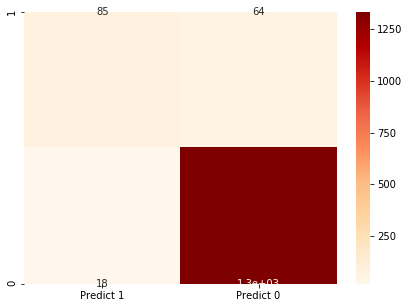

In [365]:
print("Confusion Matrix for Logistic regression")
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, cmap = "OrRd")

The confusion matrix results::

True Positives (TP): we correctly predicted that they opted for personal loan = 85

True Negatives (TN): we correctly predicted that they have not opted for personal loan = 1300

False Positives (FP)(Type I error): we incorrectly predicted that they opted for personal loan (a "Type I error") = 18 

False Negatives (FN)(Type II error): we incorrectly predicted that they have not opted for personal loan (a "Type II error")  = 64 

### K-NN Classifier

In [366]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn import metrics
# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors = 3)
# fitting the model
knn.fit(X_train, y_train)
# predict the response
y_pred_3 = knn.predict(X_test)
# evaluate accuracy
print("The Accuracy score of K-NN Classifier with 3 neighbours is:: ",accuracy_score(y_test, y_pred_3))


# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=5)
# fitting the model
knn.fit(X_train, y_train)
# predict the response
y_pred_5 = knn.predict(X_test)
# evaluate accuracy
print("The Accuracy score of K-NN Classifier with 5 neighbours is:: ",accuracy_score(y_test, y_pred_5))


# instantiate learning model (k = 9)
knn = KNeighborsClassifier(n_neighbors=9)
# fitting the model
knn.fit(X_train, y_train)
# predict the response
y_pred_9 = knn.predict(X_test)
# evaluate accuracy
print("The Accuracy score of K-NN Classifier with 9 neighbours is:: ",accuracy_score(y_test, y_pred_9))

The Accuracy score of K-NN Classifier with 3 neighbours is::  0.9033333333333333
The Accuracy score of K-NN Classifier with 5 neighbours is::  0.9073333333333333
The Accuracy score of K-NN Classifier with 9 neighbours is::  0.91


In [367]:
# creating odd list of K for KNN
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 9


As we have found out above and we have cross validated the same that the maximum accuracy achieved is by 9 neighbour K-NN classifier.

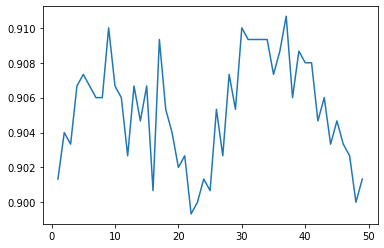

In [368]:
scores =[]
for k in range(1,50):
    NNH = KNeighborsClassifier(n_neighbors = k )
    NNH.fit(X_train, y_train)
    scores.append(NNH.score(X_test, y_test))
    
plt.plot(range(1,50),scores)

Confusion Matrix for 9 neighbour K-NN classifier


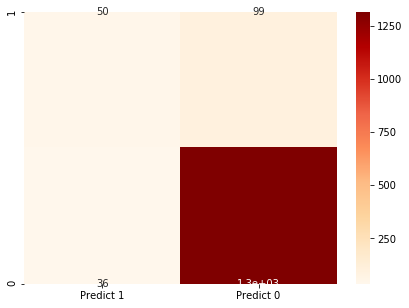

In [369]:
print("Confusion Matrix for 9 neighbour K-NN classifier")
cm=metrics.confusion_matrix(y_test, y_pred_9, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in [1,0]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, cmap = "OrRd")

The confusion matrix results::

True Positives (TP): we correctly predicted that they opted for personal loan = 50

True Negatives (TN): we correctly predicted that they have not opted for personal loan = 1300

False Positives (FP)(Type I error): we incorrectly predicted that they opted for personal loan (a "Type I error") = 36

False Negatives (FN)(Type II error): we incorrectly predicted that they have not opted for personal loan (a "Type II error") = 99

### Gaussian Naïve Bayes Classifier

In [370]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# creatw the model
loan_model = GaussianNB()

loan_model.fit(X_test, y_test)

GaussianNB(priors=None, var_smoothing=1e-09)

In [371]:
loan_test_predict = loan_model.predict(X_test)

from sklearn import metrics

print("Model Accuracy of Naive Bayes Gaussian algorithm: {0:.4f}".format(metrics.accuracy_score(y_test, loan_test_predict)))
print()

Model Accuracy of Naive Bayes Gaussian algorithm: 0.8740



Confusion Matrix for Naive Bayes Gaussian algorithm


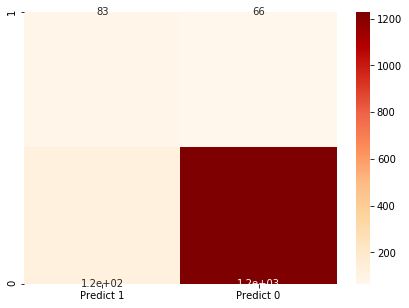

In [372]:
print("Confusion Matrix for Naive Bayes Gaussian algorithm")
cm=metrics.confusion_matrix(y_test, loan_test_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in [1,0]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,cmap = "OrRd")

The confusion matrix results::

True Positives (TP): we correctly predicted that they opted for personal loan = 83

True Negatives (TN): we correctly predicted that they have not opted for personal loan = 1200

False Positives (FP)(Type I error): we incorrectly predicted that they opted for personal loan (a "Type I error") = 122

False Negatives (FN)(Type II error): we incorrectly predicted that they have not opted for personal loan (a "Type II error") = 66

### 7. Give your reasoning on which is the best model in this case and why it performs better?

The Accuracy score of Logistic regression is::  94.53%
Out of 149 true, true positives are 85
Out of 1351 false, true negatives are close to 1300

The Accuracy score of K-NN Classifier with 9 neighbours is::  91%
Out of 149 true, true positives are 50
Out of 1351 false, true negatives are close to 1300

The Model Accuracy of Naive Bayes Gaussian algorithm: 87.40%
Out of 149 true, true positives are 83
Out of 1351 false, true negatives are close to 1200

Thus it is quite evident that Logistic regression gives the best accuracy score.